# Random blocks



Square blocks are dropped into a grid, similar to the game
[Connect 4](https://en.wikipedia.org/wiki/Connect_Four).

 
A block starts in some column and 
falls vertically stopping :

- on the bottom of the grid
- on another block already on the grid
- next to another block already on the grid.

so it stops as soon as one of the folowing conditions is satisfied:
- there is a block directly below it
- there is a block on the left or right
- it reaches the bottom of the grid.

So major difference with the game **Connect 4**, 
is that our blocks are “sticky”, 
i.e. a block will stop
as soon as it meets a neighbor on the left or the right.



In [2]:
import numpy as np
import matplotlib.pyplot as plt

## make an empty grid

In [3]:
X = np.zeros((10,10), dtype=np.int8)
print(X)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


## fill in some cells with 1s

In [4]:
X[0,5] = 1
X[-1,:] = 1
print(X)

[[0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]]


## writing a function

I started writing a function to implement the stopping conditions

the blocks stops :
1. on the bottom of the grid
1. on another block already on the grid
1. next to another block already on the grid.

but I decided to do it using just numpy operations

In [40]:
def to_chk(x):
    if 1 < x < 10: 
        rr = [x - 1 , x, x + 1]
    if x == 0: 
        rr = [0, 1]
    if x == 10: 
        rr = [9,10]
    rr.extend([x + 10 for x in rr])
    return rr
    

## Tricks

1. fill the bottom row with blocks
1. blocks don't drop in the first and last columns

this makes the effective size of the grid smaller 
but makes the program easier to implement.

## Pull out a subgrid

We don't actually have to look 
at the **whole** grid to find
the resting place of the block.
To verify the three conditions 
we only have to look at 
 three columns from the grid

1. the one under the block
1. the one to the left of the block
1. the one to the right 

So let's make a copy of them:
if 0<x is the column number for the block then



In [9]:
U = grid[:, x-1: x+2]

The middle column is special: if there
is a block in it we have to stop before we hit it.
If we shift the values in this column up one place
then the stopping condition becomes symmetric.

I actually take a transpose before shifting it 
so that the column becomes a row.

In [ ]:
U = U.T 
U[1] = np.roll(U[1], -1)   

now we look for the index of  the first non zero element in each row

In [ ]:
ys, xs = np.where(U > 0)

In [5]:
def find_stop(x, grid): 
    #make a copy of the 3 cols
    U = np.copy( grid[:, x-1: x+2])
    # don't need to do this but easier to think this way
    U = U.T
    # the middle col moves up 1 
    U[1] = np.roll(U[1], -1)   
    ys, xs = np.where(U > 0)
    return min(xs)

def grid2im(grid):
    return np.stack((1 - grid.astype(np.float).T,)*3).T


def mk_shape(size=30,
             num_blocks=30*30//3,
             anim=False):

    grid = np.zeros((size, size), dtype=np.int8)
    grid[-1:] = 1 # last line is all 1
    
    frames = []
    for k in range(num_blocks):
        x = np.random.randint(1, high=size-1)  
        grid[ find_stop(x, grid), x] = 1
        if anim : frames.append(grid2im(grid))
    
    if anim: return frames
    return grid
    

print(mk_shape())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0]
 [0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0]
 [0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0

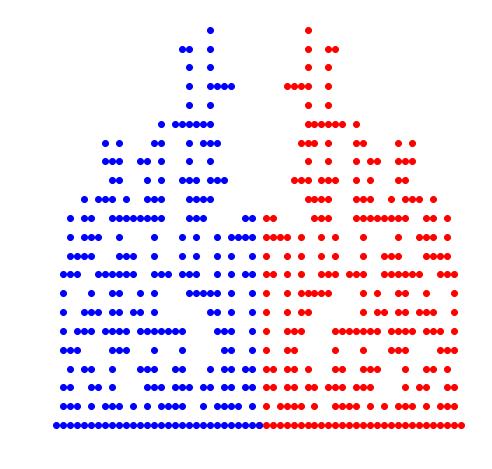

In [46]:
X, Y  = np.where( mk_shape(size=30, num_blocks=30**2//4) > 0)

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)


ax.plot(Y, -X,'ro')
ax.plot(-Y, -X,'bo'); # symmetric copy (rorschach)

plt.axis('off');

(-0.5, 99.5, 99.5, -0.5)

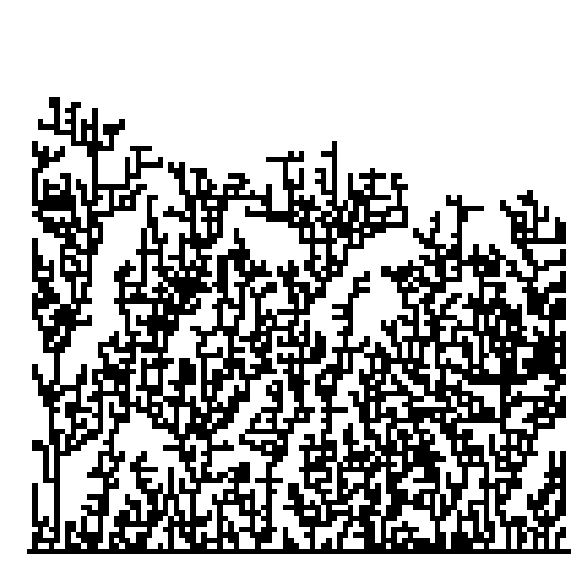

In [32]:
#r,g,b layers are all the same

N = 100
grid = mk_shape(size=N, num_blocks=N**2//3)
image = np.stack((1 - grid.astype(np.float).T,)*3).T

fig, ax = plt.subplots()
fig.set_size_inches(10,10)

ax.imshow(image); #; kills a stupid message

plt.axis('off')



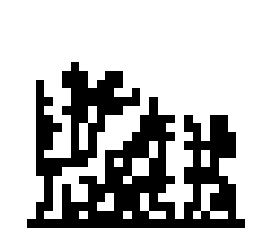

In [25]:
import  matplotlib.animation
from matplotlib import animation

from IPython.display import HTML
%matplotlib inline

def plot_images(img_list):
  def init():
    img.set_data(img_list[0])
    return (img,)

  def animate(i):
    img.set_data(img_list[i])
    return (img,)

  fig = plt.figure()
  ax = fig.gca()
  plt.axis('off')
  img = ax.imshow(img_list[0])

  anim = animation.FuncAnimation(fig, animate, 
                                 init_func=init,
                                 frames=len(img_list), 
                                 interval=60, 
                                 blit=True)
  return anim

imgs = mk_shape(size=25, num_blocks=200, anim=True)

HTML(plot_images(imgs).to_html5_video())

In [30]:
! ./.g


[master 9e6cf71] web
 1 file changed, 16 insertions(+), 22 deletions(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 4 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 8.26 KiB | 1.18 MiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/macbuse/PROGRAMMATION.git
   5a20ddc..9e6cf71  master -> master
